# Ensemble Classifiers for Imbalanced Dataset


A dataset is imbalanced if the classification categories are not approximately equally represented. 
Data sampling techniques attempt to alleviate the problem of class imbalance by adjusting the class distribution of the training data set. This can be accomplished by either removing examples from the majority class (undersampling) or adding examples to the minority class (oversampling).

In this repository, SMOTEBoost, RB-Boost, and RUS-Boost as three approaches to building ensembles of classifiers for two-class imbalanced data sets have been implemented and their performance measures and ROC curves on 5-fold imbalanced <a href="https://sci2s.ugr.es/keel/dataset.php?cod=999">yeast</a> dataset have been reported and their results have been compared with SVM classifier and AdaBoost-M2 and RandomForest ensembles.



# References:

> <a href="https://dl.acm.org/doi/abs/10.5555/1622407.1622416">[1]</a> Chawla, Nitesh V., et al. "SMOTE: synthetic minority over-sampling technique." Journal of artificial intelligence research 16 (2002): 321-357.

> <a href="https://link.springer.com/content/pdf/10.1007/978-3-540-39804-2_12.pdf">[2]</a> Chawla, Nitesh V., et al. "SMOTEBoost: Improving prediction of the minority class in boosting." European conference on principles of data mining and knowledge discovery. Springer, Berlin, Heidelberg, 2003.

> <a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.51.6252&rep=rep1&type=pdf">[3]</a> Freund, Yoav, and Robert E. Schapire. "Experiments with a new boosting algorithm." icml. Vol. 96. 1996.

> <a href="https://www.sciencedirect.com/science/article/pii/S0950705115001720">[4]</a> Díez-Pastor, José F., et al. "Random balance: ensembles of variable priors classifiers for imbalanced data." Knowledge-Based Systems 85 (2015): 96-111.

> <a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.309.2305&rep=rep1&type=pdf">[5]</a> Seiffert, Chris, et al. "RUSBoost: A hybrid approach to alleviating class imbalance." IEEE Transactions on Systems, Man, and Cybernetics-Part A: Systems and Humans 40.1 (2009): 185-197.

In [0]:
from google.colab import drive
import os
import glob
import numpy as np
import random  
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [7]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!unzip /content/gdrive/My\ Drive/Dataset/Imbalanced_Dataset/yeast-0-2-5-6_vs_3-7-8-9-5-fold.zip > /dev/null
!unzip /content/gdrive/My\ Drive/Dataset/Imbalanced_Dataset/yeast-0-2-5-6_vs_3-7-8-9.zip > /dev/null

In [9]:
!ls 

gdrive				     yeast-0-2-5-6_vs_3-7-8-9-5-3tst.dat
sample_data			     yeast-0-2-5-6_vs_3-7-8-9-5-4tra.dat
yeast-0-2-5-6_vs_3-7-8-9-5-1tra.dat  yeast-0-2-5-6_vs_3-7-8-9-5-4tst.dat
yeast-0-2-5-6_vs_3-7-8-9-5-1tst.dat  yeast-0-2-5-6_vs_3-7-8-9-5-5tra.dat
yeast-0-2-5-6_vs_3-7-8-9-5-2tra.dat  yeast-0-2-5-6_vs_3-7-8-9-5-5tst.dat
yeast-0-2-5-6_vs_3-7-8-9-5-2tst.dat  yeast-0-2-5-6_vs_3-7-8-9.dat
yeast-0-2-5-6_vs_3-7-8-9-5-3tra.dat


## Loading 5-folds cross validation dataset

In [0]:
kFold = 5

In [0]:
traFiles = sorted(glob.glob('*tra.dat'))
tstFiles = sorted(glob.glob('*tst.dat'))
X_train = []
Y_train = []
X_test = []
Y_test = []

col_names = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'Class']

for traPath, tstPath in zip(traFiles, tstFiles):
  df_train = pd.read_csv(traPath, skiprows=13, names=col_names, sep=r', ')
  df_test = pd.read_csv(tstPath, skiprows=13, names=col_names, sep=r', ')

  df_train['Class'] = (df_train['Class'] == 'negative').astype(int)
  df_test['Class'] = (df_test['Class'] == 'negative').astype(int)
  
  X_train.append(df_train[col_names[0:8]])#11
  X_test.append(df_test[col_names[0:8]])

  Y_train.append(df_train['Class'].values.tolist())
  Y_test.append(df_test['Class'].values.tolist())

for i in range(kFold):
  X_train[i] = X_train[i].values.tolist() # pandas data frame to list of lists 
  X_test[i] = X_test[i].values.tolist()

# needed in plot roc curve
df_all = pd.read_csv("yeast-0-2-5-6_vs_3-7-8-9.dat", skiprows=13, names=col_names, sep=r',')
df_all['Class'] = (df_all['Class'] == 'negative').astype(int)
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(df_all[col_names[0:8]], df_all['Class'].values.tolist(), test_size=0.33)
X_train_all = X_train_all.values.tolist()
X_test_all = X_test_all.values.tolist()

In [15]:
df_all

,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,1
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,1
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,1
3,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,1
4,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,1
...,...,...,...,...,...,...,...,...,...
999,0.78,0.74,0.58,0.25,1.0,0.0,0.53,0.22,0
1000,0.77,0.80,0.51,0.40,1.0,0.0,0.54,0.22,0
1001,0.85,0.56,0.33,0.38,1.0,0.0,0.55,0.25,0
1002,0.86,0.92,0.50,0.37,1.0,0.0,0.53,0.32,0


Minority Class Label : 0 (positive)

### A function for training, evaluating and calculating metrics:

In [0]:
def classify(model, classifier_name):
  acc = precision = recall = 0

  for i in range(kFold):
    # Training 
    model.fit(X_train[i], Y_train[i])


    # Evaluation
    y_pred = model.predict(X_test[i])

    # Result
    acc += accuracy_score(Y_test[i], y_pred)
    precision += precision_score(Y_test[i], y_pred, average='macro', zero_division=0)
    recall += recall_score(Y_test[i], y_pred, average='macro', zero_division=0)
  
  acc /= kFold
  precision /= kFold
  recall /= kFold

  print("{} Accuracy: {:.2f}".format(classifier_name, acc))
  print("{} Precision: {:.2f}".format(classifier_name, precision))
  print("{} Recall: {:.2f}".format(classifier_name, recall))

  # ROC Curve
  model.fit(X_train_all, Y_train_all)
  support = model.predict_proba(X_test_all)
  probs = support.T / np.sum(support,axis = 1)
  support = probs.T[:,0]
  
  fpr, tpr, thresholds = roc_curve(Y_test_all, support, pos_label=0) # 0 is minority class label
  plt.title('ROC Positive(0) Class')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.plot(fpr, tpr)
  plt.show()

  return acc, precision, recall

## SVM

SVM Accuracy: 0.91
SVM Precision: 0.82
SVM Recall: 0.55


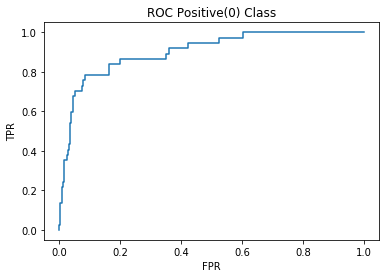

In [38]:
model = SVC(kernel ='linear', C = 1, probability=True)
acc_svm, precision_svm, recall_svm = classify(model, "SVM")

## Random Forest

### L = 10

Random Forest L10 Accuracy: 0.91
Random Forest L10 Precision: 0.78
Random Forest L10 Recall: 0.58


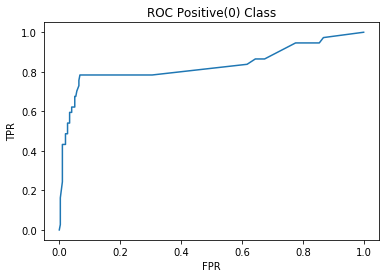

In [41]:
model = RandomForestClassifier(n_estimators=10, max_depth=2)
acc_RF_L10, precision_RF_L10, recall_RF_L10 = classify(model, "Random Forest L10")

### L = 50

Random Forest L50 Accuracy: 0.91
Random Forest L50 Precision: 0.75
Random Forest L50 Recall: 0.54


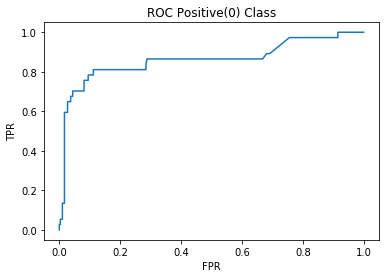

In [42]:
model = RandomForestClassifier(n_estimators=50, max_depth=2)
acc_RF_L50, precision_RF_L50, recall_RF_L50 = classify(model, "Random Forest L50")

### L = 100

Random Forest L100 Accuracy: 0.91
Random Forest L100 Precision: 0.75
Random Forest L100 Recall: 0.53


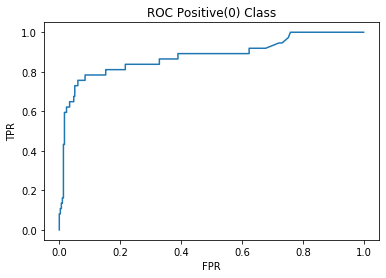

In [44]:
model = RandomForestClassifier(n_estimators=100, max_depth=2)
acc_RF_L100, precision_RF_L100, recall_RF_L100 = classify(model, "Random Forest L100")

# SMOTE

Synthetic Minority Over-sampling Technique (SMOTE) is an over-sampling approach in which the minority class is over-sampled by creating “synthetic” examples in feature space.

Synthetic samples are generated in the following way: Take the difference between the feature vector (sample) under consideration and its nearest neighbor. Multiply this difference by a random number between 0 and 1, and add it to the feature vector under consideration. This causes the selection of a random point along the line segment between two specific features. This approach effectively forces the decision region of the minority class to become more general.
Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen. According to the reference paper[1], this implementation uses five nearest neighbors.

To reuse the SMOTE algorithm in the Random-Balancex algorithm, in this implementation, unlike the algorithm mentioned in the reference paper, we consider the input parameter N the number of new synthetic data, instead of its percentage.

In [0]:
def smote(minority_x, N, k):
  """
  T: Number of minority class samples
  N: Amount of SMOTE % (old version)
  N: Number of new syntetic data (new version consistent with RBBoost)
  k: Number of nearest neighbors
  """
  T = len(minority_x)
  # if N < 100:
  #   T = int((N/100)*T)
  #   N = 100
  # N = (int)(N/100)
  numattrs = len(minority_x[0])
  synthetic = []

  #for n in range(T):
  for n in range(N):
    i = np.random.randint(0, len(minority_x)-1)
    nnarray = get_nearest_neighbor(minority_x, minority_x[i], k)
    populate(i, N, numattrs, minority_x, nnarray, synthetic, k, n) # n is index

  return synthetic

In [0]:
def get_nearest_neighbor(minority_x, x, k):
  """
  x: data that we want to find its neighbor
  """

  distances = []
  nearest_neighbors_index = []

  for i in range(len(minority_x)):
    if minority_x[i][:] == x:
      continue
    
    # euclidean distance
    distance = np.sqrt(np.sum(np.square(np.array(x) - np.array(minority_x[i][:]))))
    distances.append([distance, i])

  distances = sorted(distances)

  # return the k nearest neighbors of x
  for i in range(k):
    nearest_neighbors_index.append(distances[i][1])

  return nearest_neighbors_index

In [0]:
def populate(i, N, numattrs, minority_x, nnarray, synthetic, k, new_index):

  #new_index = 0
  #while N != 0:
  nn = np.random.randint(1, k) # booth low and high are inclusive
  #This step chooses one of the k nearest neighbors of i

  temp = []
  for attr in range(numattrs):
    dif = minority_x[nnarray[nn]][attr] - minority_x[i][attr]
    gap = random.random()
    temp.insert(attr, minority_x[i][attr] + gap * dif)

  synthetic.insert(new_index, temp)
    #new_index += 1
    #N = N-1

  return

In [27]:
# DEBUGGING: Testing SMOTE
min_x = [X_train[0][i] for i in range(len(X_train[0])) if Y_train[0][i] == 0]
print("The number of all train objects: ", len(X_train[0]))
print("The number of minority class objects before SMOTE: ", len(min_x))

# N = |Synthetic data| = |minority class objects| * 2
X_syn = smote(min_x, N=len(min_x)*2, k=5) 
print("\nThe number of synthetic objects created from minority class objects after SMOTE:\n", len(X_syn))

# N = |Synthetic data| = 10
X_syn = smote(min_x, N=10, k=5)
print("The number of synthetic objects created from minority class objects after SMOTE:\n", len(X_syn))

The number of all train objects:  803
The number of minority class objects before SMOTE:  79

The number of synthetic objects created from minority class objects after SMOTE:
 158
The number of synthetic objects created from minority class objects after SMOTE:
 10


## SMOTEBOOST

SMOTEBoost algorithm combines the Synthetic Minority Oversampling Technique (SMOTE) and the standard boosting procedure. The standard boosting algorithm (Adaboost) treats both kinds of errors (FP and FN) in a
similar fashion, and therefore sampling distributions in subsequent boosting iterations could have a larger composition of majority class cases.
SMOTEBoost only SMOTE for the minority class examples in the distribution D at the iteration t. This has an implicit effect of increasing the sampling weights of minority class cases, as new examples are created in D. The synthetically created minority class cases are discarded after learning a classifier at iteration t. That is, they are not added to the original training set, and new examples are constructed in each iteration t, by sampling from D. The error-estimate after each boosting iteration is on the original training set.

Utilizing a validation set to set the amount of SMOTE before the boosting iterations can be useful.

In [0]:
def SmoteBoost(X, Y, minority_class, n_estimators):
  """
  minority_class: 0 or 1
  n_estimators: Number of classifiers
  """

  classifier_list = []
  beta_list = []

  D = np.ones(len(X), dtype=np.float64)
  D[:] = 1. / len(X)

  for T in range(n_estimators):
    
    minority_x = [X[i] for i in range(len(X)) if Y[i] == minority_class]
    X_syn = smote(minority_x, N=len(minority_x)*2, k=5)
    Y_syn = np.full(len(X_syn), fill_value=minority_class, dtype=np.int64)

    D_syn = np.ones(len(X_syn), dtype=np.float64)
    D_syn[:] = 1. / len(X)

    new_X = np.vstack((X, X_syn))
    new_Y = np.append(Y, Y_syn)

    D = np.append(D[:len(X)], D_syn)
    D /= sum(D)

    decision_tree = DecisionTreeClassifier(max_depth=2)
    decision_tree.fit(new_X, new_Y, D)
    classifier_list.append(decision_tree)

    h = decision_tree.predict_proba(X)

    error = 0
    for i in range(len(X)): # error-estimate on original data
      # 1 - the probality of truth class + the probality of other class
      error = error + (D[i] * (1 - h[i][Y[i]] + h[i][1-Y[i]]))
        
    beta = error / (1 - error)
    beta_list.append(beta)
    
    for i in range(len(X)):
      # (1 - the probality of other class + the probality of truth class) * 1/2
      w = (1 - h[i][1-Y[i]] + h[i][Y[i]]) / 2

      D[i] = D[i] * pow(beta, w)
      
    D /= sum(D)
    
  return classifier_list, beta_list


In [0]:
def SmoteBoost_predict(classifier_list, beta_list, X_test):
  
  support = np.zeros((len(X_test),2),dtype=np.float)
  
  for t in range(len(classifier_list)):
    h = classifier_list[t].predict_proba(X_test)
    support += np.log((1/beta_list[t])) * h
    
  predict_label = np.argmax(support, axis = 1)
      
  return predict_label

In [0]:
def SmoteBoost_support(classifier_list, beta_list, X_test):
  
  support = np.zeros((len(X_test),2),dtype=np.float)
  
  for t in range(len(classifier_list)):
    h = classifier_list[t].predict_proba(X_test)
    support += np.log((1/beta_list[t])) * h

  probs = support.T / np.sum(support,axis = 1)
  
  return probs.T

In [0]:
def run_SmoteBoost(n_estimators):
  acc_smoteBoost = precision_smoteBoost = recall_smoteBoost = 0

  for i in range(kFold):
    classifiers, betas = SmoteBoost(X_train[i], Y_train[i], minority_class=0, n_estimators = n_estimators)
    y_pred = SmoteBoost_predict(classifiers, betas, X_test[i])

    acc_smoteBoost += accuracy_score(Y_test[i], y_pred)
    precision_smoteBoost += precision_score(Y_test[i], y_pred, average='macro', zero_division=0)
    recall_smoteBoost += recall_score(Y_test[i], y_pred, average='macro', zero_division=0)
    
  acc_smoteBoost /= kFold
  precision_smoteBoost /= kFold
  recall_smoteBoost /= kFold

  print("\nL = {}: ".format(n_estimators))
  print("SmoteBoost L{} Accuracy: {:.2f}".format(n_estimators, acc_smoteBoost))
  print("SmoteBoost L{} Precision: {:.2f}".format(n_estimators, precision_smoteBoost))
  print("SmoteBoost L{} Recall: {:.2f}".format(n_estimators, recall_smoteBoost))

  #ROC Curve
  classifiers, betas = SmoteBoost(X_train_all, Y_train_all, minority_class=0, n_estimators = n_estimators)
  support = SmoteBoost_support(classifiers, betas, X_test_all)
  
  fpr, tpr, thresholds = roc_curve(Y_test_all, support[:,0], pos_label=0) # 0 is minority class label
  plt.title('ROC Positive(0) Class')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.plot(fpr, tpr)
  plt.show()

  return acc_smoteBoost, precision_smoteBoost, recall_smoteBoost


L = 10: 
SmoteBoost L10 Accuracy: 0.92
SmoteBoost L10 Precision: 0.78
SmoteBoost L10 Recall: 0.79


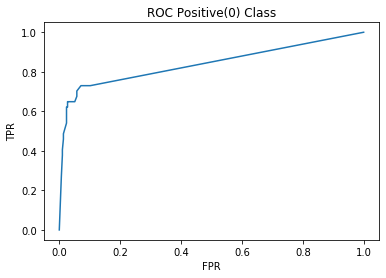


L = 50: 
SmoteBoost L50 Accuracy: 0.92
SmoteBoost L50 Precision: 0.78
SmoteBoost L50 Recall: 0.79


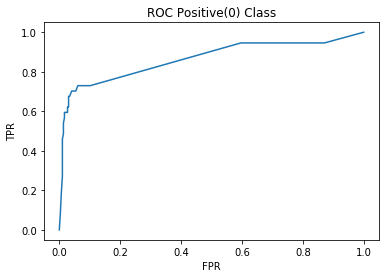


L = 100: 
SmoteBoost L100 Accuracy: 0.92
SmoteBoost L100 Precision: 0.78
SmoteBoost L100 Recall: 0.79


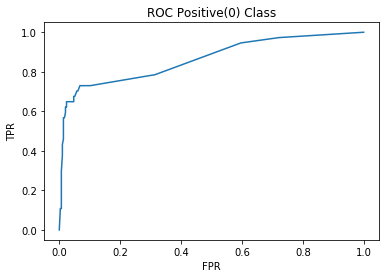

In [45]:
acc_smoteBoost_L10, precision_smoteBoost_L10, recall_smoteBoost_L10 = run_SmoteBoost(n_estimators=10)
acc_smoteBoost_L50, precision_smoteBoost_L50, recall_smoteBoost_L50 = run_SmoteBoost(n_estimators=50)
acc_smoteBoost_L100, precision_smoteBoost_L100, recall_smoteBoost_L100 = run_SmoteBoost(n_estimators=100)

## Ada-Boost M2

In the AdaBoost-M2  a more sophisticated error is defined that is called pseudo-loss. Unlike ordinary error in M1 which is computed with respect to a distribution over examples, pseudo-loss is computed with respect to a distribution over the set of all pairs of examples and incorrect labels.
More formally, a mislabel is a pair (i,y) where i is the index of a training example and y is an incorrect label
associated with example i. Let B be the set of all mislabels: $$B = \left\{(i,y) : i \in \left\{1,...,m\right\}, y\neq y_i\right\}$$
On each iteration t of boosting, AdaBoost.M2 supplies the weak learner (Decision Tree with max_depth=2 here) with a mislabel distribution D.
The weak learner computes a hypothesis h in [0,1]. It can be verified that the pseudo-loss is minimized when correct labels $y_i$ are assigned the value
1 and incorrect labels $y \neq y_i$ assigned the value 0.

$$\epsilon = \frac{1}{2} \sum_{(i,y)\in B} D_t(i,y) (1 - h_t(x_i, y_i) + h_t(x_i, y))$$



In [0]:
def AdaBoostM2(X, Y, n_estimators):
  """
  n_estimators: Number of classifiers
  """

  classifier_list = []
  beta_list = []

  D = np.ones(len(X), dtype=np.float64)
  D[:] = 1. / len(X) 
  """
  D must be initialized with 1/|B|
  while in classification problems with 2 classes |B| = |m| = len(X)
  """

  for T in range(n_estimators):
    
    decision_tree = DecisionTreeClassifier(max_depth=5)
    decision_tree.fit(X, Y, D)
    classifier_list.append(decision_tree)

    h = decision_tree.predict_proba(X)

    error = 0
    for i in range(len(X)):
        # 1 - the probality of truth class + the probality of other class
      error = error + (D[i] * (1 - h[i][Y[i]] + h[i][1-Y[i]]))
    
    error /= 2.
    beta = error / (1 - error)
    beta_list.append(beta)
    
    for i in range(len(X)):
      # (1 + the probality of truth class - the probality of other class) * 1/2
      w = (1 + h[i][Y[i]] - h[i][1-Y[i]]) / 2

      D[i] = D[i] * pow(beta, w)
      
    D /= sum(D)
    
  return classifier_list, beta_list

In [0]:
def AdaBoostM2_predict(classifier_list, beta_list, X_test):
  
  support = np.zeros((len(X_test),2),dtype=np.float)
  
  for t in range(len(classifier_list)):
    h = classifier_list[t].predict_proba(X_test)
    support += np.log((1/beta_list[t])) * h
    
  predict_label = np.argmax(support, axis = 1)
      
  return predict_label

In [0]:
def AdaBoostM2_support(classifier_list, beta_list, X_test):
  
  support = np.zeros((len(X_test),2),dtype=np.float)
  
  for t in range(len(classifier_list)):
    h = classifier_list[t].predict_proba(X_test)
    support += np.log((1/beta_list[t])) * h

  probs = support.T / np.sum(support,axis = 1)
  
  return probs.T

In [0]:
def run_AdaBoostM2(n_estimators):
  acc_adaBoostM2 = precision_adaBoostM2 = recall_adaBoostM2 = 0

  for i in range(kFold):
    classifiers, betas = AdaBoostM2(X_train[i], Y_train[i], n_estimators = n_estimators)
    y_pred = AdaBoostM2_predict(classifiers, betas, X_test[i])

    acc_adaBoostM2 += accuracy_score(Y_test[i], y_pred)
    precision_adaBoostM2 += precision_score(Y_test[i], y_pred, average='macro', zero_division=0)
    recall_adaBoostM2 += recall_score(Y_test[i], y_pred, average='macro', zero_division=0)

  acc_adaBoostM2 /= kFold
  precision_adaBoostM2 /= kFold
  recall_adaBoostM2 /= kFold

  print("\nL = {}: ".format(n_estimators))
  print("AdaBoost-M2 L{} Accuracy: {:.2f}".format(n_estimators, acc_adaBoostM2))
  print("AdaBoost-M2 L{} Precision: {:.2f}".format(n_estimators, precision_adaBoostM2))
  print("AdaBoost-M2 L{} Recall: {:.2f}".format(n_estimators, recall_adaBoostM2))

  # ROC Curve
  classifiers, betas = AdaBoostM2(X_train_all, Y_train_all, n_estimators = n_estimators)
  predict = AdaBoostM2_predict(classifiers, betas, X_test_all)
  support = AdaBoostM2_support(classifiers, betas, X_test_all)

  acc_all = accuracy_score(Y_test_all, predict)
  precision_all = precision_score(Y_test_all, predict, average='macro', zero_division=0)
  recall_all = recall_score(Y_test_all, predict, average='macro', zero_division=0)
  
  fpr, tpr, thresholds = roc_curve(Y_test_all, support[:,0], pos_label=0) # 0 is minority class label
  plt.title('ROC Positive(0) Class')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.plot(fpr, tpr)
  plt.show()

  return acc_adaBoostM2, precision_adaBoostM2, recall_adaBoostM2


L = 10: 
AdaBoost-M2 L10 Accuracy: 0.93
AdaBoost-M2 L10 Precision: 0.83
AdaBoost-M2 L10 Recall: 0.73


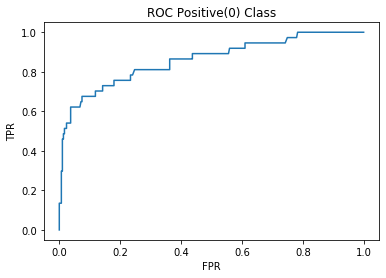


L = 50: 
AdaBoost-M2 L50 Accuracy: 0.93
AdaBoost-M2 L50 Precision: 0.85
AdaBoost-M2 L50 Recall: 0.72


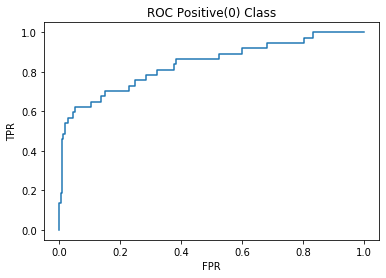


L = 100: 
AdaBoost-M2 L100 Accuracy: 0.93
AdaBoost-M2 L100 Precision: 0.86
AdaBoost-M2 L100 Recall: 0.72


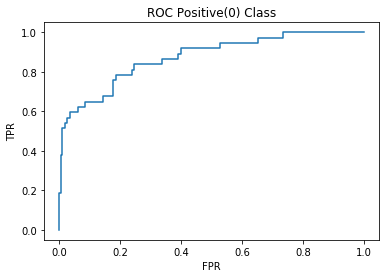

In [50]:
acc_adaBoostM2_L10, precision_adaBoostM2_L10, recall_adaBoostM2_L10 = run_AdaBoostM2(n_estimators=10)
acc_adaBoostM2_L50, precision_adaBoostM2_L50, recall_adaBoostM2_L50 = run_AdaBoostM2(n_estimators=50)
acc_adaBoostM2_L100, precision_adaBoostM2_L100, recall_adaBoostM2_L100 = run_AdaBoostM2(n_estimators=100)

## Random Balancex

This technique can be used within an ensemble to increase the diversity and deal with imbalances.
Given a data set, a different data set of the same size is obtained for each member of the ensemble where the imbalance ratio is chosen randomly. Classifiers 1; 2 . . . ; T are trained with variants of this data set where the ratio between classes varies randomly. SMOTE and Random Undersampling (resampling without replacement) are used to respectively increase or reduce the size of the classes to match the desired size.

In [0]:
def Random_Balancex(X, Y, minority_class):
  
  minority_x = [X[i] for i in range(len(X)) if Y[i] == minority_class]
  majority_x = [X[i] for i in range(len(X)) if Y[i] != minority_class]
  
  total_size = len(X)
  minority_size = len(minority_x)
  majority_size = len(majority_x)
  
  # Resulting classes will have at least 2 instances
  new_majority_size = np.random.randint(2, total_size - 2)
  new_minority_size = total_size - new_majority_size

  new_X = []
  new_Y = []

  if new_majority_size < majority_size:
    new_X.extend(minority_x)
    new_Y.extend([minority_class] * minority_size)

    new_X.extend(random.sample(majority_x, new_majority_size))
    new_Y.extend([1-minority_class] * new_majority_size)

    new_X.extend(smote(minority_x, N=new_minority_size - minority_size, k=5))
    new_Y.extend([minority_class] * (new_minority_size - minority_size))

  else:
    new_X.extend(majority_x)
    new_Y.extend([1-minority_class] * majority_size)

    new_X.extend(random.sample(minority_x, new_minority_size))
    new_Y.extend([minority_class] * new_minority_size)

    new_X.extend(smote(majority_x, new_majority_size - majority_size, k=5))
    new_Y.extend([1-minority_class] * (new_majority_size - majority_size))
  
  return new_X, new_Y

## RB-Boost
Binary Classification

In RB-Boost, for each of the iteration T a data set $\acute{S}_t$ is generated according to the Random Balancex function. Distribution $\acute{D}_t$  is updated, maintaining for each instance of the original data set its associated weight and assigning a uniform weight $\frac{1}{m}$ to the synthetic examples. Then a weak learning algorithm (Decision Tree with max_depth=3 here) is trained using $\acute{S}_t$  and $\acute{D}_t$, this classifier will give a probability between 0 and 1 to each class. The pseudo-loss $\acute{\epsilon}_t$  of
the weak classifier $h_t$ is computed. The distribution D is updated to make the weights associated with wrong classifications higher than the weights given to correct classifications on the set of our real examples.

In [0]:
def RBBoost(X, Y, minority_class, n_estimators):
  """
  minority_class: 0 or 1
  n_estimators: Number of classifiers
  """

  classifier_list = []
  beta_list = []

  D = np.ones(len(X), dtype=np.float64)
  D[:] = 1. / len(X)

  for T in range(n_estimators):
    
    new_X, new_Y = Random_Balancex(X, Y, minority_class)
    
    new_D = [0] * len(X)
    for i in range(len(X)):
      """ If the example is from the sample it maintains its weight, if the
          example is artificial it has the initial weight."""

      if new_X[i] in X: 
        new_D[i] = D[X.index(new_X[i])]
      else:
        new_D[i] = 1. / len(X)

    new_D /= sum(new_D)
    
    decision_tree = DecisionTreeClassifier(max_depth=2)
    decision_tree.fit(new_X, new_Y, new_D)
  
    h = decision_tree.predict_proba(X)

    error = 0
    for i in range(len(X)):
      # 1 - the probality of truth class + the probality of other class
      error = error + (D[i] * (1 - h[i][Y[i]] + h[i][1-Y[i]]))

    beta = error / (1 - error)
    beta_list.append(beta)
    classifier_list.append(decision_tree)
    
    for i in range(len(X)):
      # (1 + the probality of truth class - the probality of other class) * 1/2
      w = (1 + h[i][Y[i]] - h[i][1-Y[i]]) / 2 
      D[i] = D[i] * pow(beta, w)
      
    D /= sum(D)
    
  return classifier_list, beta_list

In [0]:
def RBBoost_predict(classifier_list, beta_list, X_test):
  
  support = np.zeros((len(X_test),2),dtype=np.float)
  
  for t in range(len(classifier_list)):
    h = classifier_list[t].predict_proba(X_test)
    support += np.log((1/beta_list[t]))*h
    
  predict_label = np.argmax(support, axis = 1)
      
  return predict_label

In [0]:
def RBBoost_support(classifier_list, beta_list, X_test):
  
  support = np.zeros((len(X_test),2),dtype=np.float)
  
  for t in range(len(classifier_list)):
    h = classifier_list[t].predict_proba(X_test)
    support += np.log((1/beta_list[t])) * h

  probs = support.T / np.sum(support,axis = 1)
  
  return probs.T

In [0]:
def run_RBBoost(n_estimators):
  acc_rbBoost = precision_rbBoost = recall_rbBoost = 0

  for i in range(kFold):
    classifiers, betas = RBBoost(X_train[i], Y_train[i], minority_class=0, n_estimators = n_estimators)
    y_pred = RBBoost_predict(classifiers, betas, X_test[i])

    acc_rbBoost += accuracy_score(Y_test[i], y_pred)
    precision_rbBoost += precision_score(Y_test[i], y_pred, average='macro', zero_division=0)
    recall_rbBoost += recall_score(Y_test[i], y_pred, average='macro', zero_division=0)

  acc_rbBoost /= kFold
  precision_rbBoost /= kFold
  recall_rbBoost /= kFold

  print("\nL = {}: ".format(n_estimators))
  print("RBBoost L{} Accuracy: {:.2f}".format(n_estimators, acc_rbBoost))
  print("RBBoost L{} Precision: {:.2f}".format(n_estimators, precision_rbBoost))
  print("RBBoost L{} Recall: {:.2f}".format(n_estimators, recall_rbBoost))

  # ROC Curve
  classifiers, betas = RBBoost(X_train_all, Y_train_all, minority_class=0, n_estimators = n_estimators)
  support = RBBoost_support(classifiers, betas, X_test_all)
  
  fpr, tpr, thresholds = roc_curve(Y_test_all, support[:,0], pos_label=0) # 0 is minority class label
  plt.title('ROC Positive(0) Class')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.plot(fpr, tpr)
  plt.show()

  return acc_rbBoost, precision_rbBoost, recall_rbBoost


L = 10: 
RBBoost L10 Accuracy: 0.92
RBBoost L10 Precision: 0.80
RBBoost L10 Recall: 0.68


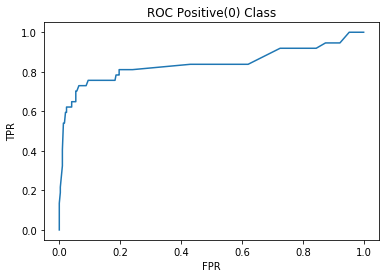


L = 50: 
RBBoost L50 Accuracy: 0.92
RBBoost L50 Precision: 0.82
RBBoost L50 Recall: 0.72


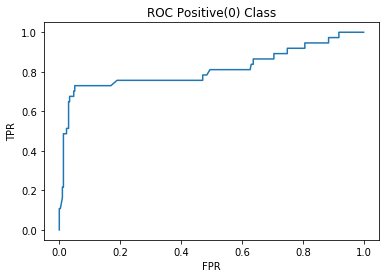


L = 100: 
RBBoost L100 Accuracy: 0.93
RBBoost L100 Precision: 0.84
RBBoost L100 Recall: 0.74


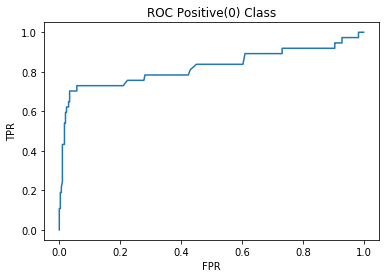

In [58]:
acc_rbBoost_L10, precision_rbBoost_L10, recall_rbBoost_L10 = run_RBBoost(n_estimators=10)
acc_rbBoost_L50, precision_rbBoost_L50, recall_rbBoost_L50 = run_RBBoost(n_estimators=50)
acc_rbBoost_L100, precision_rbBoost_L100, recall_rbBoost_L100 = run_RBBoost(n_estimators=100)

## RUSBoost
Binary Classification

RUSBoost [5], as SMOTEBoost[2], is also an AdaBoost-M2 modification, but in this case instances of the majority class are removed using random undersampling in each iteration. RUS simply removes
examples from the majority class at random until a desired class
distribution is achieved. 

The application of SMOTE at this point has two drawbacks that RUSBoost is designed to overcome. First, it increases the complexity of the algorithm. SMOTE must find the k nearest neighbors of the minority class examples and extrapolate between them to make new examples. RUS, on the other hand, simply deletes the majority class examples at random. For example, if the desired class ratio is 25 : 75, then the majority class examples are randomly removed until the numbers of majority and minority class examples are equal.
Second, since SMOTE is an oversampling technique, it results in longer model training times. On the other hand, RUS results in smaller training data sets and, therefore, shorter model training times.

In [0]:
def RUSBoost(X, Y, minority_class, n_estimators):
  """
  minority_class: 0 or 1
  n_estimators: Number of classifiers
  """

  classifier_list = []
  alpha_list = []

  D = np.ones(len(X))
  D[:] = 1. / len(X)

  for T in range(n_estimators):
    
    minority_x = [X[i] for i in range(len(X)) if Y[i] == minority_class]
    majority_x = [X[i] for i in range(len(X)) if Y[i] != minority_class]

    minority_D = [D[i] for i in range(len(D)) if Y[i] == minority_class]
    majority_D = [D[i] for i in range(len(D)) if Y[i] != minority_class]

    total_size = len(X)
    minority_size = len(minority_x)
    majority_size = len(majority_x)

    new_X = []
    new_Y = []
    new_D = []

    new_X.extend(minority_x)
    new_D.extend(minority_D)
    new_Y.extend([minority_class] * minority_size)

    XD = list(zip(majority_x, majority_D))
    maj_selected = random.sample(XD, minority_size*3) # min:25% - maj:75%
    new_X.extend( [i[0] for i in maj_selected] ) 
    new_D.extend( [i[1] for i in maj_selected] ) 
    new_Y.extend([1-minority_class] * minority_size*3)

    new_D /= sum(new_D)

    decision_tree = DecisionTreeClassifier(max_depth=2)
    decision_tree.fit(new_X, new_Y, new_D)
    classifier_list.append(decision_tree)

    predict = decision_tree.predict(X)
    h = decision_tree.predict_proba(X)

    error = 0
    for i in range(len(X)): # use Y label: update D for all objects
      # 1 - the probality of truth class + the probality of other class
      error = error + (D[i] * (1 - h[i][Y[i]] + h[i][1-Y[i]]))
        
    alpha = error / (1 - error)
    alpha_list.append(alpha)
    
    for i in range(len(X)):
      # (1 + the probality of truth class - the probality of other class) * 1/2
      w = (1 + h[i][Y[i]] - h[i][1-Y[i]]) / 2

      D[i] = D[i] * pow(alpha, w)
      
    D /= sum(D)

  return classifier_list, alpha_list

In [0]:
def RUSBoost_predict(classifier_list, alpha_list, X_test):
  
  support = np.zeros((len(X_test),2),dtype=np.float)
  
  for t in range(len(classifier_list)):
    h = classifier_list[t].predict_proba(X_test)
    support += np.log((1/alpha_list[t]))*h
    
  predict_label = np.argmax(support, axis = 1)
      
  return predict_label

In [0]:
def RUSBoost_support(classifier_list, alpha_list, X_test):
  
  support = np.zeros((len(X_test),2),dtype=np.float)
  
  for t in range(len(classifier_list)):
    h = classifier_list[t].predict_proba(X_test)
    support += np.log((1/alpha_list[t])) * h

  probs = support.T / np.sum(support,axis = 1)
  
  return probs.T

In [0]:
def run_RUSBoost(n_estimators):
  acc_rusBoost = precision_rusBoost = recall_rusBoost = 0

  for i in range(kFold):
    classifiers, alphas = RUSBoost(X_train[i], Y_train[i], minority_class=0, n_estimators = n_estimators)
    y_pred = RUSBoost_predict(classifiers, alphas, X_test[i])

    acc_rusBoost += accuracy_score(Y_test[i], y_pred)
    precision_rusBoost += precision_score(Y_test[i], y_pred, average='macro', zero_division=0)
    recall_rusBoost += recall_score(Y_test[i], y_pred, average='macro', zero_division=0)

  acc_rusBoost /= kFold
  precision_rusBoost /= kFold
  recall_rusBoost /= kFold

  print("\nL = {}: ".format(n_estimators))
  print("RUSBoost L{} Accuracy: {:.2f}".format(n_estimators, acc_rusBoost))
  print("RUSBoost L{} Precision: {:.2f}".format(n_estimators, precision_rusBoost))
  print("RUSBoost L{} Recall: {:.2f}".format(n_estimators, recall_rusBoost))

  # ROC Curve
  classifiers, alphas = RUSBoost(X_train_all, Y_train_all, minority_class=0, n_estimators = n_estimators)
  support = RUSBoost_support(classifiers, alphas, X_test_all)
  
  fpr, tpr, thresholds = roc_curve(Y_test_all, support[:,0], pos_label=0) # 0 is minority class label
  plt.title('ROC Positive(0) Class')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.plot(fpr, tpr)
  plt.show()

  return acc_rusBoost, precision_rusBoost, recall_rusBoost


L = 10: 
RUSBoost L10 Accuracy: 0.92
RUSBoost L10 Precision: 0.78
RUSBoost L10 Recall: 0.80


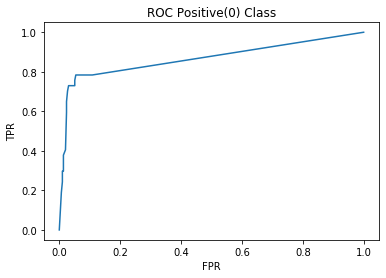


L = 50: 
RUSBoost L50 Accuracy: 0.92
RUSBoost L50 Precision: 0.77
RUSBoost L50 Recall: 0.80


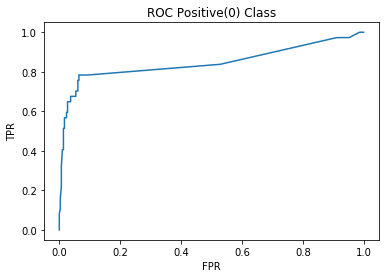


L = 100: 
RUSBoost L100 Accuracy: 0.91
RUSBoost L100 Precision: 0.76
RUSBoost L100 Recall: 0.78


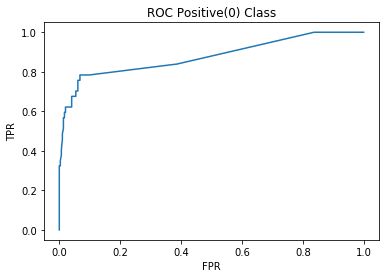

In [63]:
acc_rusBoost_L10, precision_rusBoost_L10, recall_rusBoost_L10 = run_RUSBoost(n_estimators=10)
acc_rusBoost_L50, precision_rusBoost_L50, recall_rusBoost_L50 = run_RUSBoost(n_estimators=50)
acc_rusBoost_L100, precision_rusBoost_L100, recall_rusBoost_L100 = run_RUSBoost(n_estimators=100)

## Accuracy

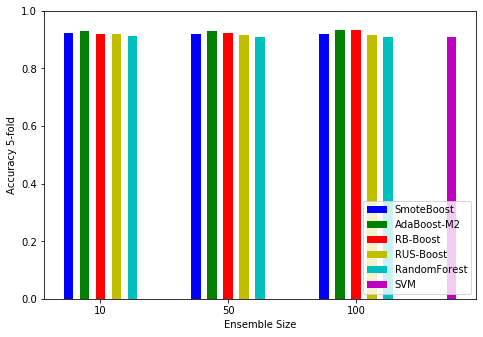

In [64]:
groups = 3
data = [[acc_smoteBoost_L10, acc_smoteBoost_L50, acc_smoteBoost_L100],
[acc_adaBoostM2_L10, acc_adaBoostM2_L50, acc_adaBoostM2_L100],
[acc_rbBoost_L10, acc_rbBoost_L50, acc_rbBoost_L100],
[acc_rusBoost_L10, acc_rusBoost_L50, acc_rusBoost_L100],
[acc_RF_L10, acc_RF_L50, acc_RF_L100],
]

X = np.arange(1, groups*2, step=2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(X - 0.50, data[0], color = 'b', width = 0.15, label = 'SmoteBoost')
ax.bar(X - 0.25, data[1], color = 'g', width = 0.15, label = 'AdaBoost-M2')
ax.bar(X + 0.00, data[2], color = 'r', width = 0.15, label = 'RB-Boost')
ax.bar(X + 0.25, data[3], color = 'y', width = 0.15, label = 'RUS-Boost')
ax.bar(X + 0.50, data[4], color = 'c', width = 0.15, label = 'RandomForest')
ax.bar(6.5, acc_svm, color = 'm', width = 0.15, label = 'SVM')

plt.xticks(X, ('10', '50', '100'))
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy 5-fold')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()

## Precision

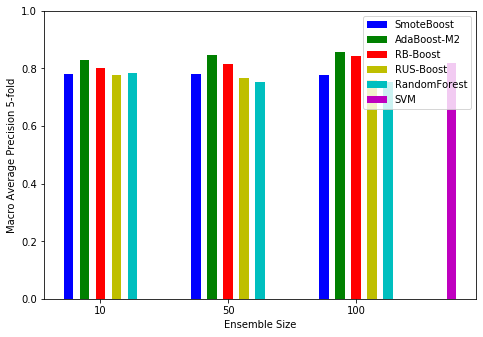

In [65]:
groups = 3
data = [[precision_smoteBoost_L10, precision_smoteBoost_L50, precision_smoteBoost_L100],
[precision_adaBoostM2_L10, precision_adaBoostM2_L50, precision_adaBoostM2_L100],
[precision_rbBoost_L10, precision_rbBoost_L50, precision_rbBoost_L100],
[precision_rusBoost_L10, precision_rusBoost_L50, precision_rusBoost_L100],
[precision_RF_L10, precision_RF_L50, precision_RF_L100],
]

X = np.arange(1, groups*2, step=2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(X - 0.50, data[0], color = 'b', width = 0.15, label = 'SmoteBoost')
ax.bar(X - 0.25, data[1], color = 'g', width = 0.15, label = 'AdaBoost-M2')
ax.bar(X + 0.00, data[2], color = 'r', width = 0.15, label = 'RB-Boost')
ax.bar(X + 0.25, data[3], color = 'y', width = 0.15, label = 'RUS-Boost')
ax.bar(X + 0.50, data[4], color = 'c', width = 0.15, label = 'RandomForest')
ax.bar(6.5, precision_svm, color = 'm', width = 0.15, label = 'SVM')

plt.xticks(X, ('10', '50', '100'))
plt.xlabel('Ensemble Size')
plt.ylabel('Macro Average Precision 5-fold')
plt.ylim(0,1)
plt.legend(loc='upper right')
plt.show()

## Recall

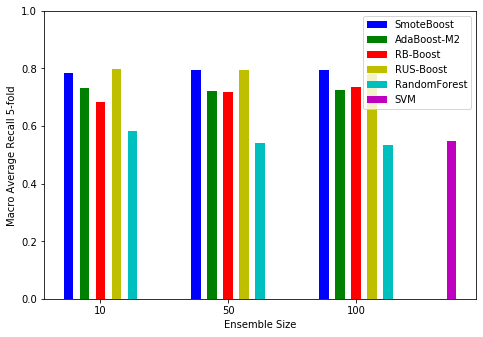

In [66]:
groups = 3
data = [[recall_smoteBoost_L10, recall_smoteBoost_L50, recall_smoteBoost_L100],
[recall_adaBoostM2_L10, recall_adaBoostM2_L50, recall_adaBoostM2_L100],
[recall_rbBoost_L10, recall_rbBoost_L50, recall_rbBoost_L100],
[recall_rusBoost_L10, recall_rusBoost_L50, recall_rusBoost_L100],
[recall_RF_L10, recall_RF_L50, recall_RF_L100],
]

X = np.arange(1, groups*2, step=2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(X - 0.50, data[0], color = 'b', width = 0.15, label = 'SmoteBoost')
ax.bar(X - 0.25, data[1], color = 'g', width = 0.15, label = 'AdaBoost-M2')
ax.bar(X + 0.00, data[2], color = 'r', width = 0.15, label = 'RB-Boost')
ax.bar(X + 0.25, data[3], color = 'y', width = 0.15, label = 'RUS-Boost')
ax.bar(X + 0.50, data[4], color = 'c', width = 0.15, label = 'RandomForest')
ax.bar(6.5, recall_svm, color = 'm', width = 0.15, label = 'SVM')

plt.xticks(X, ('10', '50', '100'))
plt.xlabel('Ensemble Size')
plt.ylabel('Macro Average Recall 5-fold')
plt.ylim(0,1)
plt.legend(loc='upper right')
plt.show()